# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Repostajes"

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

## 1. Carga de datos (0.5 puntos)

We will take the data from an input file called <code>Repostajes.csv</code> in which data of the gasoline refueling carried out in a vehicle are registered. The file is located in the <code>./data</code> folder. Each line of the input file corresponds to a refueling and contains the following information:

- **Date:** refueling date
- **Euros:** total amount paid
- **Price:** price in euros/liter paid
- **Litres:** liters introduced into the tank
- **Mileage:** total kilometers traveled by the vehicle at the time of refueling
- **Petrol station:** service station where the refueling was carried out

Here is a snippet with the first few lines of the input file:

<img src="./img/data.PNG" alt="Drawing" style="width:15cm;"/>

The first function we will implement will be the read function. It will be in charge of reading the data from the input file and loading it into a list of tuples:

In [32]:
import csv
from matplotlib import pyplot as plt
from datetime import datetime
from collections import namedtuple


In [71]:
Refuelings = namedtuple('Refuelings', 'date euros_total price_per_litr liters mileage petrol_station ')

def read_file(file):
    refuelings = []
    with open(file, 'r', encoding = 'utf-8') as f :
        reader = csv.reader(f)
        next(reader)
        refuelings = [Refuelings( datetime.strptime(date,'%d/%m/%Y').date(), float(euros_total), float(price_per_litr), float(litres), int(mileage), str(petrol_station)) 
        for date, euros_total, price_per_litr, litres, mileage, petrol_station in  reader]
    return refuelings



In [73]:
DATA = read_file('./data/Repostajes.csv')
print(len(DATA), DATA[:2])

179 [Refuelings(date=datetime.date(2011, 10, 11), euros_total=40.0, price_per_litr=1.295, liters=30.89, mileage=6, petrol_station='B'), Refuelings(date=datetime.date(2011, 10, 15), euros_total=50.0, price_per_litr=1.302, liters=38.4, mileage=345, petrol_station='C')]


## 2. Consulta y filtrado (7.5 puntos)

Once we have loaded the data into a memory structure we can start processing it. In this section we will implement some query and filter functions that will allow us to work with them.

The first function is called <code>calcula_petroleras</code> and obtains the list of gas stations, ordered alphabetically, in which some refueling has been carried out.

In [83]:
def calcula_petroleras(file):
    list_of_stations = []
    for f in file:
        if f.petrol_station  not in list_of_stations:
            list_of_stations.append(f.petrol_station)
    list_of_stations.sort()
    return list_of_stations
    

In [84]:
print(calcula_petroleras(DATA))

['A', 'B', 'C']


The following function is called <code>filter_by_date_and_gas_station</code>. Take a list of records, a list of gas stations and two dates that delimit the period of interest. You must select only those refuelings carried out at the indicated gas stations and between the specified dates.

In [78]:
def filter_by_date_and_gas_station(file, list_of_stations, start_date, end_date):
    refuelings = []
    for f in file:
        if f not in refuelings:
            if f.petrol_station in list_of_stations and start_date <=  f.date and f.date >= end_date:
                refuelings.append(f)
    return refuelings


def test_filter_by_date_and_gas_station():
    inicio = datetime.strptime('01/01/2020', '%d/%m/%Y').date()
    fin = datetime.strptime('01/06/2020', '%d/%m/%Y').date()
    print(filter_by_date_and_gas_station(DATA, ['B','C'], inicio, fin))
    
test_filter_by_date_and_gas_station()


[Refuelings(date=datetime.date(2020, 6, 11), euros_total=62.0, price_per_litr=1.065, liters=58.22, mileage=99839, petrol_station='B'), Refuelings(date=datetime.date(2020, 7, 4), euros_total=63.5, price_per_litr=1.095, liters=57.99, mileage=100681, petrol_station='C'), Refuelings(date=datetime.date(2020, 7, 26), euros_total=53.5, price_per_litr=1.109, liters=48.24, mileage=101288, petrol_station='C'), Refuelings(date=datetime.date(2020, 9, 19), euros_total=60.16, price_per_litr=1.069, liters=56.28, mileage=102486, petrol_station='C'), Refuelings(date=datetime.date(2020, 10, 30), euros_total=62.6, price_per_litr=1.065, liters=58.78, mileage=103212, petrol_station='C')]


The following function is called <code>detect_errors</code>. It takes a list of refuelings and outputs another list with those in which the data for 'euros', 'price' and 'litres' are inconsistent, taking into account an allowed margin of error.

In [81]:
def detect_errors(file, margin = 0.05):
    errors = []
    for f in file:
        if f.price_per_litr * f.liters - f.euros_total > abs(margin) :
            errors.append(f)
        return errors

print(detect_errors(DATA))

[]


In [82]:
help(dict)

Help on class dict in module builtins:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |  

The next function in this section is called <code>average_expenditure_per_gasstation</code>. It takes as input a list of records and produces as output a dictionary whose keys are the different gas stations, and the values are the average cost of the refueling carried out at those gas stations.

In [89]:
def average_expenditure_per_gasstation(file):
    dict_ = {}
    set_of_station = set({f.petrol_station for f in file })
    for station in set_of_station:
        refueling = [f.euros_total for f in file if f.petrol_station == station]
        dict_[station] = (sum(refueling)/len(refueling))
    return dict_


In [90]:
print(average_expenditure_per_gasstation(DATA))

{'C': 59.81591549295778, 'B': 49.36156862745099, 'A': 52.325087719298246}


The next function in this section is called <code>add_prices</code>. It takes as input a list of records and a function that indicates the operation to perform on the price list obtained from these records, which will be what the function must return.

In [101]:
def add_prices(file,  given_function):

    return given_function([f.price_per_litr for f in file ])
   

In [104]:
print(add_prices(DATA, min))
print(add_prices(DATA, lambda m: sum(m)/len(m)))

0.949
1.2591564245810054


In [95]:
### EJERCICIO: implementar dos llamadas de TEST de 'agrega_precios' que obtengan:
#  - El precio mínimo de la lista REGISTROS
#  - La media de precios de la lista REGISTROS

# Las salidas esperadas para estas consultas son:
#  0.949
#  1.2591564245810054


## 3. Visualización (2 puntos)

The display function that we will implement will be <code>show_price_volume</code>. It takes as input a list of records and a year and generates a curve with the price of gasoline in the refueling of that year.

In [108]:
def muestra_evolucion_precio(file, given_year):
    ''' Genera una curva con la evolución del precio de la gasolina en el año indicado.
    
    ENTRADA: 
       - registros: lista de registros -> [Repostaje(date, float, float, float, int, str)]
       - año: año para el que se debe mostrar la evolución
    SALIDA EN PANTALLA: 
       - diagrama con la evolución del precio de la gasolina

    Estas son las instrucciones 'matplotlib' para trazar el gráfico a partir de:
       - una cadena con el título que se va a mostrar en el gráfico,
       - una lista de fechas y
       - otra lista con los precios (con el mismo orden)
        
        plt.title(titulo)
        plt.plot(l_fechas,l_precios)
        plt.xticks(rotation=45)
        plt.show()
    
    Para extraer el año de un objeto datetime podemos acceder al campo 'year' (Ejemplo: miFecha.year)
    '''
    list_of_the_year = [f for f in file if f.date.year == given_year ]
    x_data = [f.date for f in list_of_the_year]
    y_cena = [f.price_per_litr for f in list_of_the_year]

    # Componemos y visualizamos la gráfica
    titulo='Evolución del precio de la gasolina'
    plt.title(titulo)
    plt.plot(x_data,y_cena)
    plt.xticks(rotation=45)
    plt.show()

La salida de la siguiente celda de test debería ser la siguiente:

<img src="./img/evolucion.png" alt="Drawing" style="width:10cm;"/>

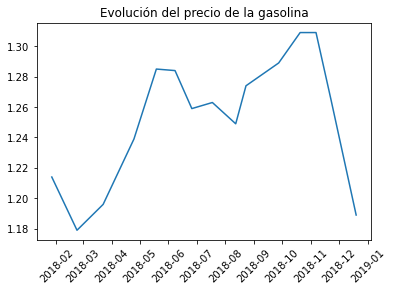

In [109]:
# Test de la función muestra_evolucion_precio
muestra_evolucion_precio(DATA, 2018)